**1. Import and Install dependences**
- Tensflow opencv-python mediapipe sklearn matplotlib

In [17]:
import torch

**2. Keypoints Using MP Holistic**

In [18]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt 
import os
import mediapipe as mp
import numpy
import time


In [19]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [20]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image, results

In [21]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [22]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=1),
                              mp_drawing.DrawingSpec(color = (80, 256, 121), thickness = 1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 106, 121), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (30, 206, 171), thickness = 2, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius=2),
                              mp_drawing.DrawingSpec(color = (80, 76, 91), thickness = 1, circle_radius=1))


In [31]:
h = 1

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  for i in range(1, 21):
    if h == 0:
       break
    # Đường dẫn đến tệp video
    video_path = f'D:\\Semester_7\\DoAnTotNghiep\\ANN\\Viet-Nam-Sign-Language-UTE-K21-\\data_set\\video_dataset\\Em_trai\\{i}.avi'

    # Mở tệp video
    cap = cv2.VideoCapture(video_path)
    # Đọc và hiển thị từng khung hình của video
    
    # Kiểm tra xem video có mở thành công không
    if not cap.isOpened():
      print("Không thể mở video")
      break
    while cap.isOpened():
        ret, frame = cap.read()  # Đọc một khung hình từ video

        if not ret:
            print("Không thể nhận khung hình (có thể video đã kết thúc)")
            break
        image, results = mediapipe_detection(frame, holistic)        
        
        draw_styled_landmarks(image, results)
        # Hiển thị khung hình
        cv2.imshow('Video', image)

        # Nhấn phím 'q' để thoát
        if cv2.waitKey(25) & 0xFF == ord('q'):
          h = 0
          break
        
    cap.release()

# Giải phóng bộ nhớ và đóng cửa sổ hiển thị

cv2.destroyAllWindows()


Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)
Không thể nhận khung hình (có thể video đã kết thúc)


In [30]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while True:
        ret , frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [26]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
draw_landmarks(frame, results)

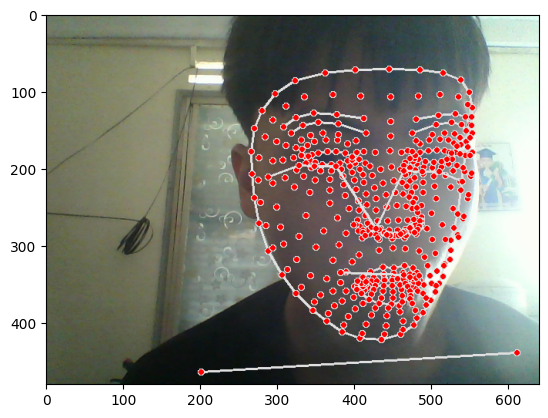

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3. Extra Keypoint Values**

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
len(pose)

33

In [ ]:
pose = np.array([res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark).flatten()

In [ ]:
pose

array([<generator object <genexpr> at 0x0000020A79FE19A0>], dtype=object)

In [ ]:
pose.shape

(1,)

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**4. Setup Folders for Collection**

In [ ]:
import cv2
import time

# Khởi tạo đối tượng video capture
cap = cv2.VideoCapture(0)

# Kiểm tra xem camera có mở thành công không
if not cap.isOpened():
    print("Error: Could not open video capture.")
    exit()
exit_flag = False
name = "Em_trai" # Tên ký hiệu sửa tại đây
# Lấy thời gian bắt đầu quay
for i in range(1,21):# Số lượng video
    # Định nghĩa codec và tạo đối tượng VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(f'./Video_dataset/{name}/{i}.avi', fourcc, 20.0, (640, 480))

    # Đặt thời gian quay video (tính bằng giây)
    duration = 2

    ret, frame = cap.read()
    if not ret:
            print("Error: Failed to capture image.")
            break
    cv2.putText(frame, f'video{i}', (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Recording", frame)
    cv2.waitKey(1000)
    cv2.putText(frame, f'Video recording will start in 1 second', (60, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow("Recording", frame)
    cv2.waitKey(1000)
    # Vòng lặp để quay video trong 2 giây
    start_time = time.time()
    while (time.time() - start_time) < duration:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        # Ghi khung hình vào file video
        out.write(frame)
        
        # Hiển thị khung hình
        cv2.imshow("Recording", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            exit_flag = True
            break

    # Kiểm tra nếu phím 'q' được nhấn để thoát vòng lặp ngoài
    if exit_flag:
        break

# Giải phóng các đối tượng
cap.release()
out.release()
cv2.destroyAllWindows()

print("Video đã được lưu vào file 'output.avi'")


Video đã được lưu vào file 'output.avi'


**5. Collect Keypoint Values for Traning and Testing**

In [ ]:
A= [0,1,2,1,1,0,1,0,2]
print(A>2)

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
A= [0,1,1,0,1,0,1]
B = [0,1,2,3,4,5,6]
print(B[A==1])

0


In [ ]:
import numpy as np

A = np.array([0, 1, 1, 0, 1, 0, 1])
B = np.array([0, 1, 2, 3, 4, 5, 6])

result = B[A == 1]
print(result)


[1 2 4 6]


In [ ]:
A = [1, 2, 3, 5, 6]
B = [2, 5, 4]

# Chuyển đổi A và B thành các tập hợp (set)
set_A = set(A)
set_B = set(B)

# Lấy hiệu của tập hợp A và B
result = list(set_A - set_B)
print(result)


[1, 3, 5, 6]


In [ ]:
A = [1, 2, 3, 4, 5, 6]
B = [2, 5, 4]
print(A  + B)



[1, 2, 3, 4, 5, 6, 2, 5, 4]


In [ ]:
A = (1,2,2)
print(A
      )

(1, 2, 2)
